# Logistic Regression

## Importing libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns # is a Python library built on top of Matplotlib that provides a high-level interface for creating statistical graphics. Its main purpose is to simplify the creation of attractive and informative visualizations for data exploration, understanding, and communication.

## Importing the dataset

In [2]:
dataset = pd.read_csv("Bank Customer Churn Prediction.csv")
dataset.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Information about the dataset, including data types and null values
dataset.info()

# Shape of the dataset (number of rows and columns)
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


(10000, 12)

In [4]:
# Checking for duplicated rows in the dataset
dataset.duplicated().sum()

0

In [5]:
dataset.drop(['customer_id'],axis=1,inplace=True) # axis=1 => I will frop the column that name is "churn", axis=0 => I will frop the row that name is "churn"

In [6]:
# Descriptive statistics of the dataset with styled background gradient
dataset.describe().style.background_gradient(cmap = "Purples")

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.705500,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.455840,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


## Extracting features (X) and target variable (y) from the dataset

In [7]:
dataset.country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
dataset['country'] = dataset['country'].map({'France': 0, 'Spain' : 1,'Germany':2})

In [9]:
dataset['gender'] = dataset['gender'].map({'Male': 0, 'Female' : 1})

In [10]:
dataset['balance']=dataset['balance'].astype(int)

In [11]:
dataset['estimated_salary']=dataset['estimated_salary'].astype(int)

In [12]:
dataset

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,1,42,2,0,1,1,1,101348,1
1,608,1,1,41,1,83807,1,0,1,112542,0
2,502,0,1,42,8,159660,3,1,0,113931,1
3,699,0,1,39,1,0,2,0,0,93826,0
4,850,1,1,43,2,125510,1,1,1,79084,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0,2,1,0,96270,0
9996,516,0,0,35,10,57369,1,1,1,101699,0
9997,709,0,1,36,7,0,1,0,1,42085,1
9998,772,2,0,42,3,75075,2,1,0,92888,1


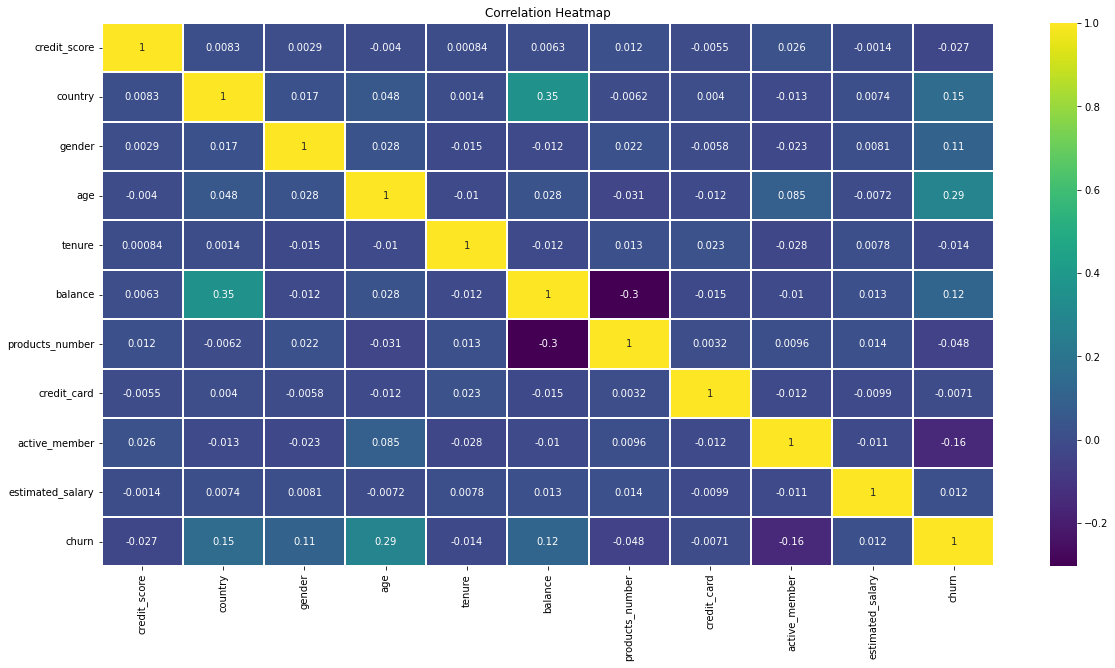

In [13]:
# Visualize the correlation between all features using a heatmap

plt.figure(figsize=(20,10)) # Make the figure will be 20 inches wide and 10 inches high.
sns.heatmap(dataset.corr(), cmap="viridis",annot=True,linewidths=0.1) # dataset.corr(): Calculates the correlation matrix of the dataset's numerical features. # cmap="viridis": Colormap used (here, viridis). # annot=True: Displays correlation values within each cell. # linewidths=0.1: Sets the width of the grid lines.
plt.title('Correlation Heatmap')
plt.show()

In [14]:
# Remove the target column "churn" from the dataset and assign the remaining columns to X as independent variables
X = dataset.drop("churn",axis=1) 
X

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,0,1,42,2,0,1,1,1,101348
1,608,1,1,41,1,83807,1,0,1,112542
2,502,0,1,42,8,159660,3,1,0,113931
3,699,0,1,39,1,0,2,0,0,93826
4,850,1,1,43,2,125510,1,1,1,79084
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0,2,1,0,96270
9996,516,0,0,35,10,57369,1,1,1,101699
9997,709,0,1,36,7,0,1,0,1,42085
9998,772,2,0,42,3,75075,2,1,0,92888


In [15]:
# Standardize the features by scaling them to have a mean of 0 and a standard deviation of 1.Standardizing features in machine learning is a crucial preprocessing step that improves the performance of many machine learning models, especially those that rely on distance-based metrics 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
X

array([[-0.32622142, -0.9025865 ,  1.09598752, ...,  0.64609167,
         0.97024255,  0.02187974],
       [-0.44003595,  0.301665  ,  1.09598752, ..., -1.54776799,
         0.97024255,  0.21653222],
       [-1.53679418, -0.9025865 ,  1.09598752, ...,  0.64609167,
        -1.03067011,  0.24068554],
       ...,
       [ 0.60498839, -0.9025865 ,  1.09598752, ..., -1.54776799,
         0.97024255, -1.00864465],
       [ 1.25683526,  1.50591651, -0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523121],
       [ 1.46377078, -0.9025865 ,  1.09598752, ...,  0.64609167,
        -1.03067011, -1.07637481]])

In [17]:
X.shape

(10000, 10)

In [18]:
# Count the occurrences of each class in the target column "churn"
dataset["churn"].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

<AxesSubplot:xlabel='churn', ylabel='count'>

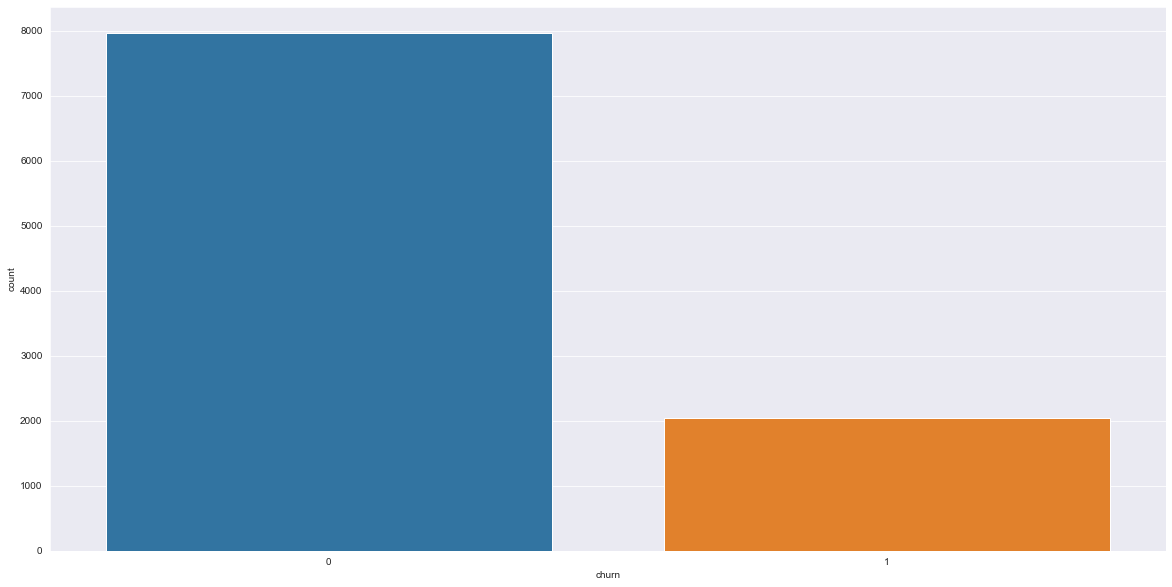

In [19]:
# Visualize the distribution of classes in the target column "churn"

plt.figure(figsize=(20,10)) # Make the figure will be 20 inches wide and 10 inches high
sns.set_style("darkgrid") # Sets the overall appearance style for future seaborn plots.
sns.countplot(x="churn",data=dataset) # Purpose: Creates a count plot to visualize the distribution of categorical data. # Parameters: # x="custcat": Specifies the name of the categorical variable to plot on the x-axis. Here, it's "custcat" from the dataset. # data=dataset: Indicates the dataset to use for creating the count plot.

In [20]:
y = dataset['churn']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

## Splitting the dataset into the Training set and Testing set

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (8000, 10) (8000,)
Test set: (2000, 10) (2000,)


## Training the Logistic Regression model on the Training set

In [22]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(x_train, y_train)

# Make predictions on the testing data using the logistic regression model
y_pred = logreg.predict(x_test)

In [23]:
# Print classification report

from sklearn.metrics import classification_report
target_names = ['Churn']
print(classification_report(y_test, y_pred)) # The classification_report function analyzes the relationship between the true labels and the predicted labels and then prints a comprehensive report summarizing the model's performance for each class.

# Precision: Proportion of predicted positives that were actually correct(out of all instances predicted positive for that class).
# Recall: Proportion of actual positives that were correctly identified(out of all actual positive instances for that class).
# F1-Score: Harmonic mean of precision and recall, combining their importance.
# Support: Total number of true instances for each class.

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1604
           1       0.65      0.23      0.34       396

    accuracy                           0.82      2000
   macro avg       0.74      0.60      0.62      2000
weighted avg       0.80      0.82      0.79      2000



In [24]:
# import the metrics class
from sklearn import metrics

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) # The confusion matrix is a table that visualizes the performance of a classification model by comparing its predicted classes against the actual classes.
cnf_matrix

array([[1555,   49],
       [ 305,   91]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

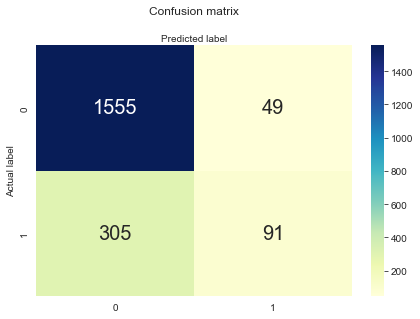

In [25]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create a heatmap of the confusion matrix using Seaborn library
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={'size':20}, cmap="YlGnBu", fmt='g')

# Set the position of the x-axis label to the top
ax.xaxis.set_label_position("top")

# Adjust the layout to prevent overlapping of elements
plt.tight_layout()

# Set the title of the plot
plt.title('Confusion matrix', y=1.1)

# Set the label for the y-axis
plt.ylabel('Actual label')

# Set the label for the x-axis
plt.xlabel('Predicted label')

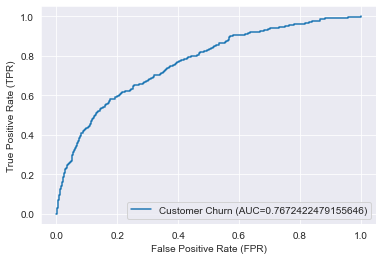

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, roc_auc_score

# Predict class probabilities for the positive class (customer churn)
y_pred_proba = logreg.predict_proba(x_test)[::, 1]

# Calculate False Positive Rate (fpr), True Positive Rate (tpr), and ignore thresholds
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Calculate Area Under the ROC Curve (AUC)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC Curve
plt.plot(fpr, tpr, label="Customer Churn (AUC="+str(auc)+")")  # More descriptive label

plt.plot(auc)

# Add axis labels
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")

# Add legend
plt.legend(loc=4)

# Display the ROC Curve
plt.show()